# Installing and Importing Libraries

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tf_keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tf_keras as keras
from tf_keras import layers, optimizers, regularizers, losses, metrics
from tf_keras.models import Sequential, clone_model
from tf_keras import mixed_precision
import datetime

# Getting the data

In [ ]:
od.download('https://www.kaggle.com/datasets/abhirampolisetti/multi-label-retinal-disease-mured-dataset')

Skipping, found downloaded files in "./multi-label-retinal-disease-mured-dataset" (use force=True to force download)


In [ ]:
train_df = pd.read_csv('/content/multi-label-retinal-disease-mured-dataset/train_data.csv')
test_df = pd.read_csv('/content/multi-label-retinal-disease-mured-dataset/test_data.csv')

In [ ]:
train_df.head()

,ID,DR,NORMAL,MH,ODC,TSLN,ARMD,DN,MYA,BRVO,...,CRVO,CNV,RS,ODE,LS,CSR,HTR,ASR,CRS,OTHER
0,aria_c_25_1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aria_c_7_2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aria_c_38_2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,aria_c_2_8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aria_c_26_15,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing

In [ ]:
train_df_id = train_df['ID']

In [ ]:
train_df['ID'][:5]

,ID
0,aria_c_25_1
1,aria_c_7_2
2,aria_c_38_2
3,aria_c_2_8
4,aria_c_26_15


In [ ]:
train_df = train_df.drop('ID', axis=1)

In [ ]:
train_df.head()

,DR,NORMAL,MH,ODC,TSLN,ARMD,DN,MYA,BRVO,ODP,CRVO,CNV,RS,ODE,LS,CSR,HTR,ASR,CRS,OTHER
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Getting Single label from one hot encoded columns

In [ ]:
train_df['true_label'] = train_df.idxmax(axis=1)

In [ ]:
len(train_df['true_label'].value_counts())

20

In [ ]:
train_df = train_df['true_label']

In [ ]:
train_df = pd.DataFrame(train_df)
train_df['id'] = train_df_id

In [ ]:
train_df.head(5)

,true_label,id
0,NORMAL,aria_c_25_1
1,NORMAL,aria_c_7_2
2,NORMAL,aria_c_38_2
3,NORMAL,aria_c_2_8
4,NORMAL,aria_c_26_15


In [ ]:
train_df['true_label'].value_counts()

,count
true_label,
DR,396
NORMAL,395
ODC,159
MH,126
OTHER,119
ARMD,100
DN,97
TSLN,56
BRVO,48


In [ ]:
# Doing same for test_df
test_df_id = test_df['ID']
test_df = test_df.drop('ID', axis=1)

test_df['true_label'] = test_df.idxmax(axis=1)
test_df = test_df['true_label']

test_df = pd.DataFrame(test_df)
test_df['id'] = test_df_id

test_df.head(5)

,true_label,id
0,NORMAL,aria_c_28_19
1,NORMAL,aria_c_36_4
2,NORMAL,aria_c_40_b_14
3,NORMAL,aria_c_23_23
4,NORMAL,aria_c_43_1


## Label Encoding

In [ ]:
train_actual_labels = train_df['true_label'].values
test_actual_labels = test_df['true_label'].values

In [ ]:
train_actual_labels[:5]

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL'], dtype=object)

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Transform the labels in both datasets
train_df['true_label'] = le.fit_transform(train_df['true_label'])
test_df['true_label'] = le.transform(test_df['true_label'])

In [ ]:
class_names = le.classes_

In [ ]:
class_names[13]

'NORMAL'

# Dealing with images

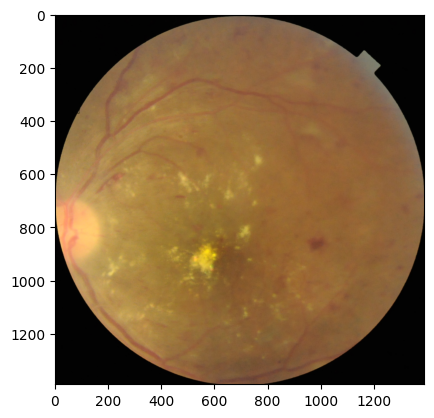

In [ ]:
# Lets see first what they actually are
img = mpimg.imread('/content/multi-label-retinal-disease-mured-dataset/images/images/1.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# getting all images in images[]
images = []
image_dir = '/content/multi-label-retinal-disease-mured-dataset/images/images'

for filename in os.listdir(image_dir):
  filepath = os.path.join(image_dir, filename)
  images.append(filepath)

In [ ]:
images[:5]

['/content/multi-label-retinal-disease-mured-dataset/images/images/aria_d_9_3.png',
 '/content/multi-label-retinal-disease-mured-dataset/images/images/im0285.png',
 '/content/multi-label-retinal-disease-mured-dataset/images/images/1636.png',
 '/content/multi-label-retinal-disease-mured-dataset/images/images/10.png',
 '/content/multi-label-retinal-disease-mured-dataset/images/images/592.png']

In [ ]:
len(images)

2451

In [ ]:
len(train_df)

1764

In [ ]:
len(test_df)

444

In [ ]:
len(train_df) + len(test_df)

2208

In [ ]:
test_df.head(5)

,true_label,id
0,13,aria_c_28_19
1,13,aria_c_36_4
2,13,aria_c_40_b_14
3,13,aria_c_23_23
4,13,aria_c_43_1


Finding images present in train_data but not in train_df or test_df

In [ ]:
train_ids = set(train_df['id'].astype(str))
test_ids = set(test_df['id'].astype(str))

image_files = set()
for file in images:
    image_id = os.path.splitext(os.path.basename(file))[0]
    image_files.add(image_id)

# Finding images present in train_data but not in train_df or test_df
missing_ids = image_files - (train_ids | test_ids)
print(f"Images in 'images' but not in train_df or test_df: {missing_ids}")

# Full image paths
missing_image_paths = [file for file in images if os.path.splitext(os.path.basename(file))[0] in missing_ids]

Images in 'images' but not in train_df or test_df: {'im0318', '11', '1578', '399', '1914', '436', 'im0358', '1595', 'im0279', '428', 'im0305', 'aria_d_10_2', '657', '761', '1146', '208', '232', '549', '1653', '1585', '1566', '1249', '1428', '1285', '981', '1720', 'im0295', '416', '244', 'im0346', '247', '672', '1056', '746', 'im0214', '76', '528', 'im0066', '1076', '1680', '1625', '971', '1615', '1248', '747', 'im0281', 'im0051', '1651', '335', '1672', 'im0335', '1632', '391', '1694', '932', '1724', '780', 'aria_d_29', '1915', 'im0324', 'aria_a_43_9', '919', '405', 'im0244', '1293', 'im0164', '251', '183', '1683', '128', '1233', 'im0166', '1440', '1621', '1317', '1211', '962', '887', '386', '1606', 'im0165', '1490', '1279', '157', '415', 'im0013', '1573', '355', 'aria_d_1_2', 'im0344', '1722', '1677', '163', '1686', '1574', 'aria_a_18_23', '927', '762', 'aria_d_24_21', '1641', '1057', '1150', '113', '1182', '323', '1749', '1221', '1609', '72', '968', '1212', '1531', '495', '745', '507'

In [ ]:
len(missing_ids)

243

243 images are extra in images

## Ensuring consistency in images

There are some files in .tif format, lets convert them all into .png for consistency.

In [ ]:
images_folder = '/content/multi-label-retinal-disease-mured-dataset/images/images'

# converting all images to png
def convert_tif_to_png(directory):
  for filename in os.listdir(directory):
    if filename.endswith(".tif"):
      filepath = os.path.join(directory, filename)
      try:
        img = Image.open(filepath)
        png_filepath = os.path.splitext(filepath)[0] + ".png"
        img.save(png_filepath)
        print(f"Converted {filepath} to {png_filepath}")
        os.remove(filepath) # removing the original .tif file
      except Exception as e:
        print(f"Error converting {filepath}: {e}")

convert_tif_to_png('/content/multi-label-retinal-disease-mured-dataset/images/images')

## Creating a feature in dataset

In [ ]:
train_df['image_path'] = train_df['id'].apply(lambda x: os.path.join(images_folder, x))
test_df['image_path'] = test_df['id'].apply(lambda x: os.path.join(images_folder, x))

Let's add .png at the end of file names in both train_df and test_df

In [ ]:
train_df['image_path'] = train_df['image_path'] + '.png'
test_df['image_path'] = test_df['image_path'] + '.png'

In [ ]:
train_df = train_df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)

In [ ]:
train_df.head(5)

,true_label,image_path
0,13,/content/multi-label-retinal-disease-mured-dat...
1,13,/content/multi-label-retinal-disease-mured-dat...
2,13,/content/multi-label-retinal-disease-mured-dat...
3,13,/content/multi-label-retinal-disease-mured-dat...
4,13,/content/multi-label-retinal-disease-mured-dat...


## Preprocessing Images

In [ ]:
train_df['true_label'] = train_df['true_label'].astype('int32')
test_df['true_label'] = test_df['true_label'].astype('int32')

In [ ]:
# Preprocessing function for images and labels
def preprocess_image_with_label(image_path, label, target_size=(224, 224)):
    # Convert the TensorFlow tensor to a string path
    image_path = image_path.numpy().decode('utf-8')
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array, label

# Wrapper to handle eager execution for TensorFlow Dataset's map
def preprocess_wrapper(image_path, label):
    img_array, processed_label = tf.py_function(
        func=preprocess_image_with_label,
        inp=[image_path, label],
        Tout=(tf.float32, tf.int32)
    )
    img_array.set_shape((224, 224, 3))
    processed_label.set_shape(())  # Label should be scalar
    return img_array, processed_label

In [ ]:
# Convert the DataFrame to a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['image_path'], train_df['true_label']))
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['image_path'], test_df['true_label']))

In [ ]:
# Apply the preprocessing function
train_data = train_dataset.map(preprocess_wrapper, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_dataset.map(preprocess_wrapper, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

Ehmm! Prefetch dataset, one we are familiar with from food101

### Mixed Precision

To make efficient use of all bits of 16 and 32 bit to train faster.

In [ ]:
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
# Check the policy
mixed_precision.global_policy()

<Policy "mixed_float16">

### Callbacks

In [ ]:
checkpoint_path = "model_checkpoints/model_1.ckpt"
ModelCheckpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                  monitor="val_accuracy",
                                                  save_best_only=True,
                                                  save_weights_only=True,
                                                  verbose=1)

In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Model 1 - EfficientNetV2B0

In [ ]:
import tf_keras as keras
import tf_keras.layers as layers

# Define input shape and class names
input_shape = (224, 224, 3)

# Create the base model
base_model = keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False  # Freezing the base model layers

# Creating the functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = layers.Dense(len(class_names), name="output_layer")(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)

# Define the model
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 20)                25620     
                                                                 
 softmax_float32 (Activatio  (None, 20)                0         
 n)                                                        

## Checking if 'Is_trainable' for various layers

In [ ]:
for layers in model_1.layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetv2-b0 False float32 <Policy "mixed_float16">
global_average_pooling_layer True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


Also check this in base layer

In [ ]:
for layers in model_1.layers[1].layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1a_project_activation False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False float32 <Policy "mixed_float16">
block2a_expand_activation False float32 <Policy "mixed_float16">
block2a_project_conv False float32 <Policy "mixed_float16">
block2a_project_bn False float32 <Policy "mixed_float16">
block2b_expand_conv False float32 <Policy "mixed_float16">
block2b_expand_bn False float32 <Policy "mixed_float16">
block2b_expand_activation False float32 <Policy "mixed_float16">
block2b_project_conv False float32 <Policy

## Callbacks

In [ ]:
checkpoint_path = "model_checkpoints/model_1.ckpt"
ModelCheckpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                  monitor="val_accuracy",
                                                  save_best_only=True,
                                                  save_weights_only=True,
                                                  verbose=1)

## Fitting 1st Model

In [ ]:
initial_epochs = 5

history_1 = model_1.fit(train_data,
                        epochs=initial_epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)),
                        callbacks=[create_tensorboard_callback("mured", "model_1"),
                                   ModelCheckpoint])

Saving TensorBoard log files to: mured/model_1/20241127-205141
Epoch 1/5
56/56 [==============================] - ETA: 0s - loss: 2.4870 - accuracy: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.29688, saving model to model_checkpoints/model_1.ckpt
56/56 [==============================] - 94s 857ms/step - loss: 2.4870 - accuracy: 0.2188 - val_loss: 2.1234 - val_accuracy: 0.2969
Epoch 2/5
55/56 [============================>.] - ETA: 0s - loss: 2.4509 - accuracy: 0.2153
Epoch 2: val_accuracy did not improve from 0.29688
56/56 [==============================] - 72s 780ms/step - loss: 2.4500 - accuracy: 0.2154 - val_loss: 2.0737 - val_accuracy: 0.2812
Epoch 3/5
54/56 [===========================>..] - ETA: 1s - loss: 2.4475 - accuracy: 0.2309
Epoch 3: val_accuracy did not improve from 0.29688
56/56 [==============================] - 72s 765ms/step - loss: 2.4474 - accuracy: 0.2313 - val_loss: 2.1229 - val_accuracy: 0.2812
Epoch 4/5
54/56 [===========================>..] - ETA: 1s -

In [ ]:
model_1_results = model_1.evaluate(test_data)
model_1_results

14/14 [==============================] - 19s 1s/step - loss: 2.4466 - accuracy: 0.2230


[2.4465720653533936, 0.22297297418117523]

# Model 2 - Fine tuned - EfficientNetV2B0

In [ ]:
model_2 = clone_model(model_1)

In [ ]:
for layer in model_2.layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_layer float32 <Policy "float32"> True
efficientnetv2-b0 float32 <Policy "mixed_float16"> True
global_average_pooling_layer float32 <Policy "mixed_float16"> True
output_layer float32 <Policy "mixed_float16"> True
softmax_float32 float32 <Policy "float32"> True


In [ ]:
# First check all layers of base model
for layer in model_2.layers[1].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_1 float32 <Policy "float32"> True
rescaling float32 <Policy "mixed_float16"> False
normalization float32 <Policy "mixed_float16"> False
stem_conv float32 <Policy "mixed_float16"> False
stem_bn float32 <Policy "mixed_float16"> False
stem_activation float32 <Policy "mixed_float16"> False
block1a_project_conv float32 <Policy "mixed_float16"> False
block1a_project_bn float32 <Policy "mixed_float16"> False
block1a_project_activation float32 <Policy "mixed_float16"> False
block2a_expand_conv float32 <Policy "mixed_float16"> False
block2a_expand_bn float32 <Policy "mixed_float16"> False
block2a_expand_activation float32 <Policy "mixed_float16"> False
block2a_project_conv float32 <Policy "mixed_float16"> False
block2a_project_bn float32 <Policy "mixed_float16"> False
block2b_expand_conv float32 <Policy "mixed_float16"> False
block2b_expand_bn float32 <Policy "mixed_float16"> False
block2b_expand_activation float32 <Policy "mixed_float16"> False
block2b_project_conv float32 <Policy "mixed

In [ ]:
# Set all layers of the base model trainable= true
model_2.layers[1].trainable = True

In [ ]:
for layer in model_2.layers[1].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_1 float32 <Policy "float32"> True
rescaling float32 <Policy "mixed_float16"> True
normalization float32 <Policy "mixed_float16"> True
stem_conv float32 <Policy "mixed_float16"> True
stem_bn float32 <Policy "mixed_float16"> True
stem_activation float32 <Policy "mixed_float16"> True
block1a_project_conv float32 <Policy "mixed_float16"> True
block1a_project_bn float32 <Policy "mixed_float16"> True
block1a_project_activation float32 <Policy "mixed_float16"> True
block2a_expand_conv float32 <Policy "mixed_float16"> True
block2a_expand_bn float32 <Policy "mixed_float16"> True
block2a_expand_activation float32 <Policy "mixed_float16"> True
block2a_project_conv float32 <Policy "mixed_float16"> True
block2a_project_bn float32 <Policy "mixed_float16"> True
block2b_expand_conv float32 <Policy "mixed_float16"> True
block2b_expand_bn float32 <Policy "mixed_float16"> True
block2b_expand_activation float32 <Policy "mixed_float16"> True
block2b_project_conv float32 <Policy "mixed_float16"> True


In [ ]:
# Freeze back every layer except for last 5
for layer in model_2.layers[1].layers[:-5]:
  layer.trainable = False

In [ ]:
# Checking all layers in the base model again, now all except 5 must be trainable = false
for layer in model_2.layers[1].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_1 float32 <Policy "float32"> False
rescaling float32 <Policy "mixed_float16"> False
normalization float32 <Policy "mixed_float16"> False
stem_conv float32 <Policy "mixed_float16"> False
stem_bn float32 <Policy "mixed_float16"> False
stem_activation float32 <Policy "mixed_float16"> False
block1a_project_conv float32 <Policy "mixed_float16"> False
block1a_project_bn float32 <Policy "mixed_float16"> False
block1a_project_activation float32 <Policy "mixed_float16"> False
block2a_expand_conv float32 <Policy "mixed_float16"> False
block2a_expand_bn float32 <Policy "mixed_float16"> False
block2a_expand_activation float32 <Policy "mixed_float16"> False
block2a_project_conv float32 <Policy "mixed_float16"> False
block2a_project_bn float32 <Policy "mixed_float16"> False
block2b_expand_conv float32 <Policy "mixed_float16"> False
block2b_expand_bn float32 <Policy "mixed_float16"> False
block2b_expand_activation float32 <Policy "mixed_float16"> False
block2b_project_conv float32 <Policy "mixe

## Callbacks

In [ ]:
# Model CheckPoint
checkpoint_path_2 = "model_checkpoints/model_2.ckpt"

ModelCheckpoint = keras.callbacks.ModelCheckpoint(checkpoint_path_2,
                                                  monitor = "val_accuracy",
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  save_freq = "epoch")

In [ ]:
# Early stopping callback
EarlyStopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                              patience=3)

In [ ]:
ReduceLR = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                             patience=3,
                                             factor=0.2,
                                             verbose=1,
                                             min_lr=1e-7)

In [ ]:
initial_epochs

5

## Recompile fine tuned model

In [ ]:
# Re compile the model
model_2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(0.001), #10x less lr since we are fine tuning
              metrics=["accuracy"])

## Fitting 2nd Model

In [ ]:
# Refitting the model with fine tuning of 5 layers
fine_epochs = initial_epochs + 5
history_2 = model_2.fit(train_data,
                        epochs=fine_epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps= 0.15 * len(test_data),
                        initial_epoch=history_1.epoch[-1],
                        callbacks=[create_tensorboard_callback("mured", "model_2"),
                                    ModelCheckpoint,
                                    EarlyStopping,
                                    ReduceLR])

Saving TensorBoard log files to: mured/model_2/20241127-210210
Epoch 5/10
56/56 [==============================] - 113s 1s/step - loss: 2.5413 - accuracy: 0.2126 - val_loss: 2.3207 - val_accuracy: 0.2292 - lr: 0.0010
Epoch 6/10
56/56 [==============================] - 101s 1s/step - loss: 2.4245 - accuracy: 0.2149 - val_loss: 2.3161 - val_accuracy: 0.2604 - lr: 0.0010
Epoch 7/10
56/56 [==============================] - 91s 906ms/step - loss: 2.4213 - accuracy: 0.2239 - val_loss: 2.3201 - val_accuracy: 0.2292 - lr: 0.0010
Epoch 8/10
56/56 [==============================] - 91s 909ms/step - loss: 2.4205 - accuracy: 0.2336 - val_loss: 2.3146 - val_accuracy: 0.2604 - lr: 0.0010
Epoch 9/10
55/56 [============================>.] - ETA: 0s - loss: 2.4191 - accuracy: 0.2261
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
56/56 [==============================] - 78s 846ms/step - loss: 2.4199 - accuracy: 0.2256 - val_loss: 2.3063 - val_accuracy: 0.2604 - lr: 0.0010


In [ ]:
model_2_results = model_2.evaluate(test_data)
model_2_results

14/14 [==============================] - 29s 2s/step - loss: 2.4093 - accuracy: 0.2230


[2.4093146324157715, 0.22297297418117523]

## Visualising performance

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

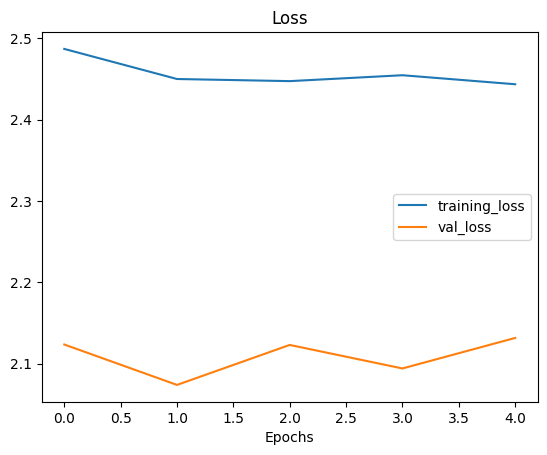

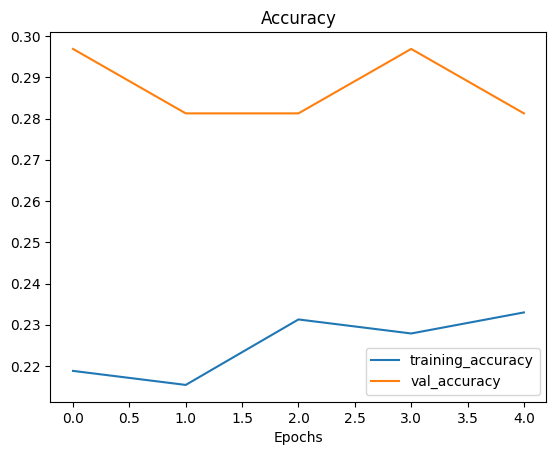

In [ ]:
# Plotting Loss Curves of Feature Extraction Model
plot_loss_curves(history_1)

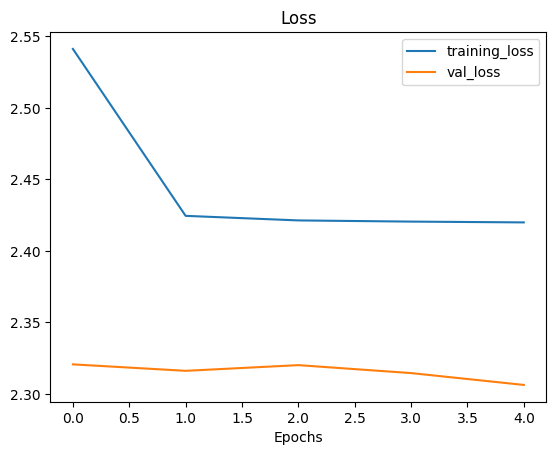

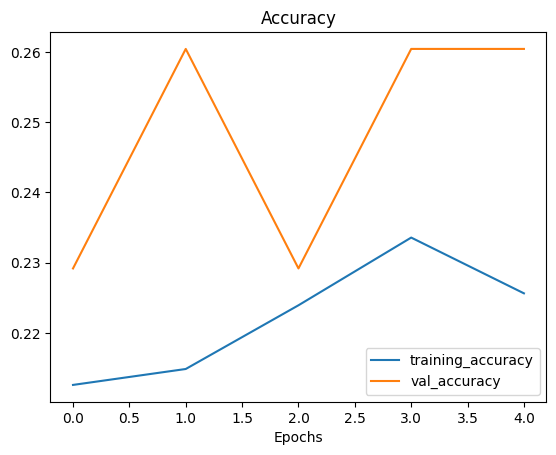

In [ ]:
# For fine tuning model
plot_loss_curves(history_2)

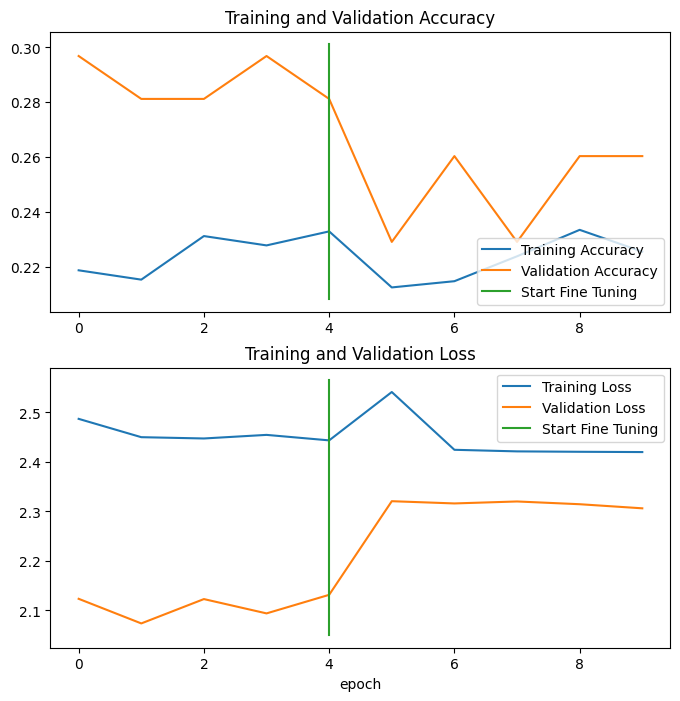

In [ ]:
# Comparing histories
compare_historys(history_1, history_2, 5)

# Model 3 -Resnet101V2

In [ ]:
import tf_keras as keras
import tf_keras.layers as layers

# Define input shape and class names
input_shape = (224, 224, 3)

# Create the base model
base_model = keras.applications.ResNet101V2(include_top=False)
base_model.trainable = False  # Freezing the base model layers

# Creating the functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = layers.Dense(len(class_names), name="output_layer")(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)

# Define the model
model_3 = keras.Model(inputs, outputs)

# Compile the model
model_3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet101v2 (Functional)    (None, None, None, 2048   42626560  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 20)                40980     
                                                                 
 softmax_float32 (Activatio  (None, 20)                0         
 n)                                                        

## Checking if 'Is_trainable' for various layers

In [ ]:
for layers in model_3.layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_layer True float32 <Policy "float32">
resnet101v2 False float32 <Policy "mixed_float16">
global_average_pooling_layer True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


Also check this in base layer

In [ ]:
for layers in model_3.layers[1].layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_3 False float32 <Policy "float32">
conv1_pad False float32 <Policy "mixed_float16">
conv1_conv False float32 <Policy "mixed_float16">
pool1_pad False float32 <Policy "mixed_float16">
pool1_pool False float32 <Policy "mixed_float16">
conv2_block1_preact_bn False float32 <Policy "mixed_float16">
conv2_block1_preact_relu False float32 <Policy "mixed_float16">
conv2_block1_1_conv False float32 <Policy "mixed_float16">
conv2_block1_1_bn False float32 <Policy "mixed_float16">
conv2_block1_1_relu False float32 <Policy "mixed_float16">
conv2_block1_2_pad False float32 <Policy "mixed_float16">
conv2_block1_2_conv False float32 <Policy "mixed_float16">
conv2_block1_2_bn False float32 <Policy "mixed_float16">
conv2_block1_2_relu False float32 <Policy "mixed_float16">
conv2_block1_0_conv False float32 <Policy "mixed_float16">
conv2_block1_3_conv False float32 <Policy "mixed_float16">
conv2_block1_out False float32 <Policy "mixed_float16">
conv2_block2_preact_bn False float32 <Policy "mixed_f

## Callbacks

In [ ]:
# Model CheckPoint
checkpoint_path_3 = "model_checkpoints/model_3.ckpt"

ModelCheckpoint = keras.callbacks.ModelCheckpoint(checkpoint_path_3,
                                                  monitor = "val_accuracy",
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  save_freq = "epoch")

## Fitting 3rd Model

In [ ]:
initial_epochs = 5

history_3 = model_3.fit(train_data,
                        epochs=initial_epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)),
                        callbacks=[create_tensorboard_callback("mured", "model_3"),
                                   ModelCheckpoint])

Saving TensorBoard log files to: mured/model_3/20241127-211337
Epoch 1/5
56/56 [==============================] - 109s 1s/step - loss: 2.3497 - accuracy: 0.3163 - val_loss: 1.4594 - val_accuracy: 0.5000
Epoch 2/5
56/56 [==============================] - 103s 1s/step - loss: 1.6915 - accuracy: 0.4586 - val_loss: 1.4080 - val_accuracy: 0.5312
Epoch 3/5
56/56 [==============================] - 78s 829ms/step - loss: 1.5067 - accuracy: 0.5102 - val_loss: 1.4088 - val_accuracy: 0.5000
Epoch 4/5
56/56 [==============================] - 81s 865ms/step - loss: 1.3676 - accuracy: 0.5550 - val_loss: 1.2759 - val_accuracy: 0.5781
Epoch 5/5
56/56 [==============================] - 75s 824ms/step - loss: 1.2633 - accuracy: 0.5958 - val_loss: 1.2192 - val_accuracy: 0.5781


In [ ]:
model_3_results = model_3.evaluate(test_data)
model_3_results

14/14 [==============================] - 20s 1s/step - loss: 1.4711 - accuracy: 0.5068


[1.4711408615112305, 0.5067567825317383]

# Model 4 - Fine tuned - Resnet101v2

In [ ]:
model_4 = clone_model(model_3)

In [ ]:
for layer in model_4.layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_layer float32 <Policy "float32"> True
resnet101v2 float32 <Policy "mixed_float16"> True
global_average_pooling_layer float32 <Policy "mixed_float16"> True
output_layer float32 <Policy "mixed_float16"> True
softmax_float32 float32 <Policy "float32"> True


In [ ]:
# First check all layers of base model
for layer in model_4.layers[1].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_3 float32 <Policy "float32"> True
conv1_pad float32 <Policy "mixed_float16"> False
conv1_conv float32 <Policy "mixed_float16"> False
pool1_pad float32 <Policy "mixed_float16"> False
pool1_pool float32 <Policy "mixed_float16"> False
conv2_block1_preact_bn float32 <Policy "mixed_float16"> False
conv2_block1_preact_relu float32 <Policy "mixed_float16"> False
conv2_block1_1_conv float32 <Policy "mixed_float16"> False
conv2_block1_1_bn float32 <Policy "mixed_float16"> False
conv2_block1_1_relu float32 <Policy "mixed_float16"> False
conv2_block1_2_pad float32 <Policy "mixed_float16"> False
conv2_block1_2_conv float32 <Policy "mixed_float16"> False
conv2_block1_2_bn float32 <Policy "mixed_float16"> False
conv2_block1_2_relu float32 <Policy "mixed_float16"> False
conv2_block1_0_conv float32 <Policy "mixed_float16"> False
conv2_block1_3_conv float32 <Policy "mixed_float16"> False
conv2_block1_out float32 <Policy "mixed_float16"> False
conv2_block2_preact_bn float32 <Policy "mixed_float16"

In [ ]:
# Set all layers of the base model trainable= true
model_4.layers[1].trainable = True

In [ ]:
for layer in model_4.layers[1].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_3 float32 <Policy "float32"> True
conv1_pad float32 <Policy "mixed_float16"> True
conv1_conv float32 <Policy "mixed_float16"> True
pool1_pad float32 <Policy "mixed_float16"> True
pool1_pool float32 <Policy "mixed_float16"> True
conv2_block1_preact_bn float32 <Policy "mixed_float16"> True
conv2_block1_preact_relu float32 <Policy "mixed_float16"> True
conv2_block1_1_conv float32 <Policy "mixed_float16"> True
conv2_block1_1_bn float32 <Policy "mixed_float16"> True
conv2_block1_1_relu float32 <Policy "mixed_float16"> True
conv2_block1_2_pad float32 <Policy "mixed_float16"> True
conv2_block1_2_conv float32 <Policy "mixed_float16"> True
conv2_block1_2_bn float32 <Policy "mixed_float16"> True
conv2_block1_2_relu float32 <Policy "mixed_float16"> True
conv2_block1_0_conv float32 <Policy "mixed_float16"> True
conv2_block1_3_conv float32 <Policy "mixed_float16"> True
conv2_block1_out float32 <Policy "mixed_float16"> True
conv2_block2_preact_bn float32 <Policy "mixed_float16"> True
conv2_blo

In [ ]:
# Freeze back every layer except for last 5
for layer in model_4.layers[1].layers[:-5]:
  layer.trainable = False

In [ ]:
# Checking all layers in the base model again, now all except 5 must be trainable = false
for layer in model_4.layers[1].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_3 float32 <Policy "float32"> False
conv1_pad float32 <Policy "mixed_float16"> False
conv1_conv float32 <Policy "mixed_float16"> False
pool1_pad float32 <Policy "mixed_float16"> False
pool1_pool float32 <Policy "mixed_float16"> False
conv2_block1_preact_bn float32 <Policy "mixed_float16"> False
conv2_block1_preact_relu float32 <Policy "mixed_float16"> False
conv2_block1_1_conv float32 <Policy "mixed_float16"> False
conv2_block1_1_bn float32 <Policy "mixed_float16"> False
conv2_block1_1_relu float32 <Policy "mixed_float16"> False
conv2_block1_2_pad float32 <Policy "mixed_float16"> False
conv2_block1_2_conv float32 <Policy "mixed_float16"> False
conv2_block1_2_bn float32 <Policy "mixed_float16"> False
conv2_block1_2_relu float32 <Policy "mixed_float16"> False
conv2_block1_0_conv float32 <Policy "mixed_float16"> False
conv2_block1_3_conv float32 <Policy "mixed_float16"> False
conv2_block1_out float32 <Policy "mixed_float16"> False
conv2_block2_preact_bn float32 <Policy "mixed_float16

## Callbacks

In [ ]:
# Model CheckPoint
checkpoint_path_4 = "model_checkpoints/model_4.ckpt"

ModelCheckpoint = keras.callbacks.ModelCheckpoint(checkpoint_path_4,
                                                  monitor = "val_accuracy",
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  save_freq = "epoch")

In [ ]:
# Early stopping callback
EarlyStopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                              patience=3)

In [ ]:
ReduceLR = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                             patience=3,
                                             factor=0.2,
                                             verbose=1,
                                             min_lr=1e-7)

In [ ]:
initial_epochs

5

## Recompile fine tuned model

In [ ]:
# Re compile the model
model_4.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(0.001), #10x less lr since we are fine tuning
              metrics=["accuracy"])

## Fitting 4th Model

In [ ]:
# Refitting the model with fine tuning of 5 layers
fine_epochs = initial_epochs + 5
history_4 = model_4.fit(train_data,
                        epochs=fine_epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps= 0.15 * len(test_data),
                        initial_epoch=history_1.epoch[-1],
                        callbacks=[create_tensorboard_callback("mured", "model_4"),
                                    ModelCheckpoint,
                                    EarlyStopping,
                                    ReduceLR])

Saving TensorBoard log files to: mured/model_4/20241127-212219
Epoch 5/10
56/56 [==============================] - 89s 916ms/step - loss: 2.5389 - accuracy: 0.2222 - val_loss: 2.3129 - val_accuracy: 0.2604 - lr: 0.0010
Epoch 6/10
56/56 [==============================] - 78s 888ms/step - loss: 2.4334 - accuracy: 0.2511 - val_loss: 2.3091 - val_accuracy: 0.2917 - lr: 0.0010
Epoch 7/10
56/56 [==============================] - 75s 844ms/step - loss: 2.3996 - accuracy: 0.2517 - val_loss: 2.2994 - val_accuracy: 0.3229 - lr: 0.0010
Epoch 8/10
56/56 [==============================] - 75s 815ms/step - loss: 2.3754 - accuracy: 0.2670 - val_loss: 2.2754 - val_accuracy: 0.3021 - lr: 0.0010
Epoch 9/10
56/56 [==============================] - 76s 856ms/step - loss: 2.3543 - accuracy: 0.2755 - val_loss: 2.2836 - val_accuracy: 0.3646 - lr: 0.0010
Epoch 10/10
56/56 [==============================] - 75s 842ms/step - loss: 2.3432 - accuracy: 0.2766 - val_loss: 2.2288 - val_accuracy: 0.2083 - lr: 0.0010


In [ ]:
model_4_results = model_4.evaluate(test_data)
model_4_results

14/14 [==============================] - 19s 1s/step - loss: 2.3293 - accuracy: 0.2342


[2.3292653560638428, 0.23423422873020172]

## Visualising performance

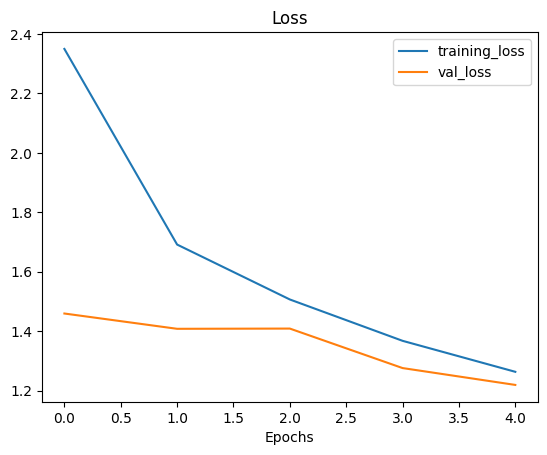

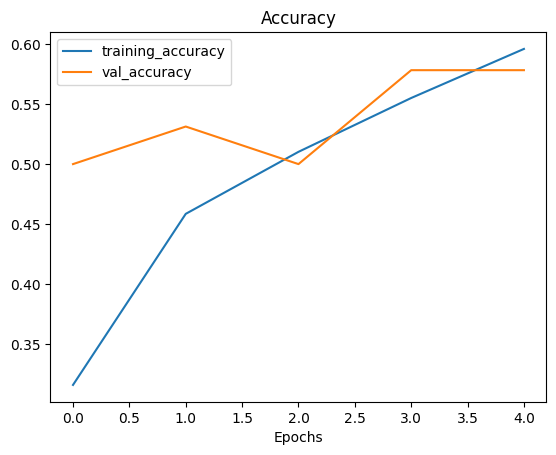

In [ ]:
# Plotting Loss Curves of Feature Extraction Model
plot_loss_curves(history_3)

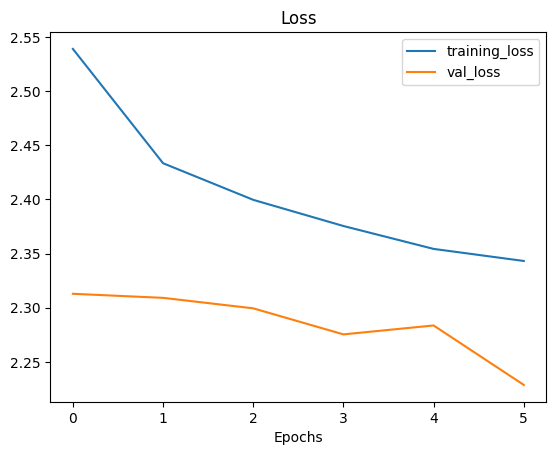

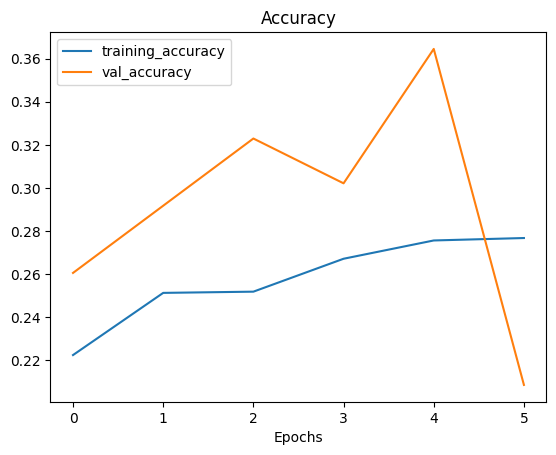

In [ ]:
# For fine tuning model
plot_loss_curves(history_4)

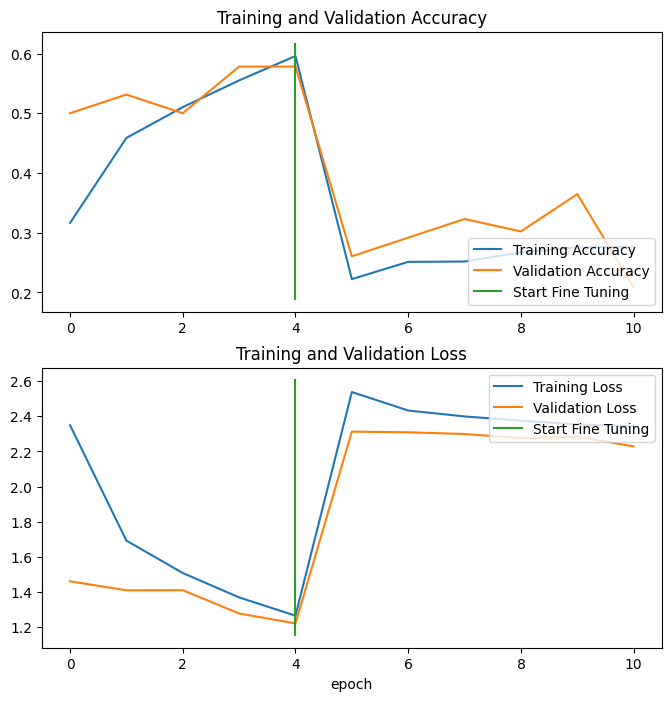

In [ ]:
# Comparing histories
compare_historys(history_3, history_4, 5)

fine tuning just make things worse in our case

# Model 5 : Ensemble of Xception and Resnet

In [ ]:
import tf_keras as keras
import tf_keras.layers as layers

input_shape = (224, 224, 3)

# Loading both models
xception_base = keras.applications.Xception(include_top=False, input_shape=input_shape)
xception_base.trainable = False  # Freezing the Xception base model layers

resnet_base = keras.applications.ResNet101V2(include_top=False, input_shape=input_shape)
resnet_base.trainable = False  # Freezing the ResNet base model layers

# Creating input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Getting outputs from both the models
xception_output = xception_base(inputs, training=False)
resnet_output = resnet_base(inputs, training=False)

# Applying pooling layer
xception_pooling = layers.GlobalAveragePooling2D()(xception_output)

resnet_pooling = layers.GlobalAveragePooling2D()(resnet_output)

# Concatenatenating outputs of both
x = layers.concatenate([xception_pooling, resnet_pooling])

# Add a dense layer and the output layer
x = layers.Dense(1024, activation='relu', name="dense_layer")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(len(class_names), name="output_layer")(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)

# Define the model
model_5 = keras.Model(inputs, outputs)

# Compile the model
model_5.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_5.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 xception (Functional)       (None, 7, 7, 2048)           2086148   ['input_layer[0][0]']         
                                                          0                                       
                                                                                                  
 resnet101v2 (Functional)    (None, 7, 7, 2048)           4262656   ['input_layer[0][0]']         
                                                          0                                       
                                                                                            

## Callbacks

In [ ]:
# Model CheckPoint
checkpoint_path_5 = "model_checkpoints/model_5.ckpt"

ModelCheckpoint = keras.callbacks.ModelCheckpoint(checkpoint_path_5,
                                                  monitor = "val_accuracy",
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  save_freq = "epoch")

In [ ]:
# Early stopping callback
EarlyStopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                              patience=3)

## Fitting Model 5

In [ ]:
# Fitting the model for 5 epochs
initial_epochs = 5

history_5 = model_5.fit(train_data,
                        epochs=initial_epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps= 0.15 * len(test_data),
                        callbacks=[create_tensorboard_callback("mured", "model_5"),
                                    ModelCheckpoint,
                                    EarlyStopping])

Saving TensorBoard log files to: mured/model_5/20241127-214435
Epoch 1/5
56/56 [==============================] - 105s 1s/step - loss: 2.5350 - accuracy: 0.3520 - val_loss: 1.6095 - val_accuracy: 0.4479
Epoch 2/5
56/56 [==============================] - 83s 979ms/step - loss: 1.7593 - accuracy: 0.4660 - val_loss: 1.5232 - val_accuracy: 0.5104
Epoch 3/5
56/56 [==============================] - 78s 839ms/step - loss: 1.6011 - accuracy: 0.5023 - val_loss: 1.5929 - val_accuracy: 0.4688
Epoch 4/5
56/56 [==============================] - 83s 972ms/step - loss: 1.5357 - accuracy: 0.5125 - val_loss: 1.3803 - val_accuracy: 0.5625
Epoch 5/5
56/56 [==============================] - 79s 873ms/step - loss: 1.4187 - accuracy: 0.5431 - val_loss: 1.3635 - val_accuracy: 0.5521


In [ ]:
model_5_results = model_5.evaluate(test_data)
model_5_results

14/14 [==============================] - 20s 1s/step - loss: 1.4903 - accuracy: 0.5180


[1.4902604818344116, 0.5180180072784424]

## Visualising Performance

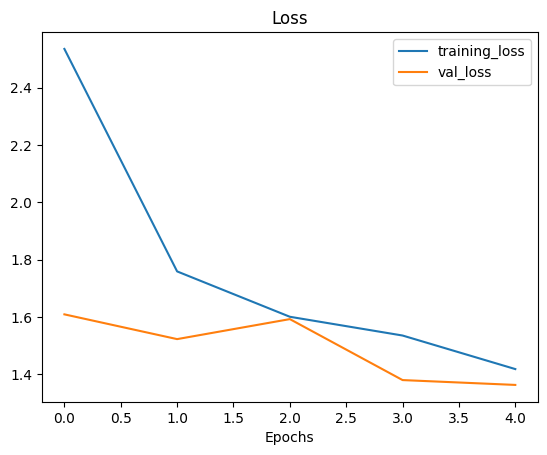

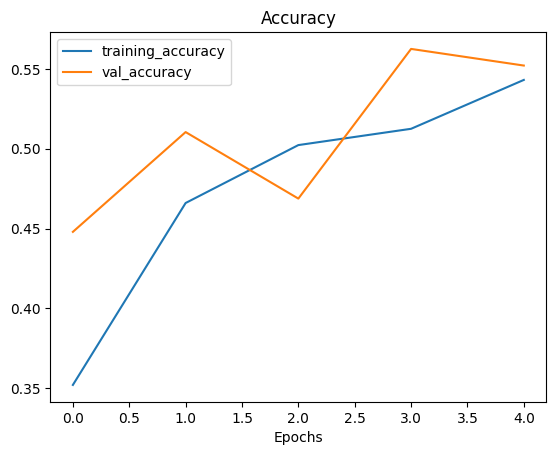

In [ ]:
plot_loss_curves(history_5)

# Model 6 - Fine Tuned Ensemble

In [ ]:
model_6 = clone_model(model_5)

In [ ]:
for layer in model_6.layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_layer float32 <Policy "float32"> True
xception float32 <Policy "mixed_float16"> True
resnet101v2 float32 <Policy "mixed_float16"> True
global_average_pooling2d_4 float32 <Policy "mixed_float16"> True
global_average_pooling2d_5 float32 <Policy "mixed_float16"> True
concatenate_2 float32 <Policy "mixed_float16"> True
dense_layer float32 <Policy "mixed_float16"> True
dropout_2 float32 <Policy "mixed_float16"> True
output_layer float32 <Policy "mixed_float16"> True
softmax_float32 float32 <Policy "float32"> True


In [ ]:
# Layers in Xception
for layer in model_6.layers[1].layers:
  layer.trainable  = True

In [ ]:
for layer in model_6.layers[1].layers[:-10]:
  layer.trainable = False

In [ ]:
for layer in model_6.layers[1].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_10 float32 <Policy "float32"> False
block1_conv1 float32 <Policy "mixed_float16"> False
block1_conv1_bn float32 <Policy "mixed_float16"> False
block1_conv1_act float32 <Policy "mixed_float16"> False
block1_conv2 float32 <Policy "mixed_float16"> False
block1_conv2_bn float32 <Policy "mixed_float16"> False
block1_conv2_act float32 <Policy "mixed_float16"> False
block2_sepconv1 float32 <Policy "mixed_float16"> False
block2_sepconv1_bn float32 <Policy "mixed_float16"> False
block2_sepconv2_act float32 <Policy "mixed_float16"> False
block2_sepconv2 float32 <Policy "mixed_float16"> False
block2_sepconv2_bn float32 <Policy "mixed_float16"> False
conv2d_14 float32 <Policy "mixed_float16"> False
block2_pool float32 <Policy "mixed_float16"> False
batch_normalization_12 float32 <Policy "mixed_float16"> False
add_36 float32 <Policy "mixed_float16"> False
block3_sepconv1_act float32 <Policy "mixed_float16"> False
block3_sepconv1 float32 <Policy "mixed_float16"> False
block3_sepconv1_bn float3

In [ ]:
# Layers in Resnet
for layer in model_6.layers[2].layers:
  layer.trainable  = True

In [ ]:
for layer in model_6.layers[2].layers[:-10]:
  layer.trainable = False

In [ ]:
for layer in model_6.layers[2].layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_11 float32 <Policy "float32"> False
conv1_pad float32 <Policy "mixed_float16"> False
conv1_conv float32 <Policy "mixed_float16"> False
pool1_pad float32 <Policy "mixed_float16"> False
pool1_pool float32 <Policy "mixed_float16"> False
conv2_block1_preact_bn float32 <Policy "mixed_float16"> False
conv2_block1_preact_relu float32 <Policy "mixed_float16"> False
conv2_block1_1_conv float32 <Policy "mixed_float16"> False
conv2_block1_1_bn float32 <Policy "mixed_float16"> False
conv2_block1_1_relu float32 <Policy "mixed_float16"> False
conv2_block1_2_pad float32 <Policy "mixed_float16"> False
conv2_block1_2_conv float32 <Policy "mixed_float16"> False
conv2_block1_2_bn float32 <Policy "mixed_float16"> False
conv2_block1_2_relu float32 <Policy "mixed_float16"> False
conv2_block1_0_conv float32 <Policy "mixed_float16"> False
conv2_block1_3_conv float32 <Policy "mixed_float16"> False
conv2_block1_out float32 <Policy "mixed_float16"> False
conv2_block2_preact_bn float32 <Policy "mixed_float1

## Callbacks

In [ ]:
# Model CheckPoint
checkpoint_path_6 = "model_checkpoints/model_6.ckpt"

ModelCheckpoint = keras.callbacks.ModelCheckpoint(checkpoint_path_6,
                                                  monitor = "val_accuracy",
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  save_freq = "epoch")

In [ ]:
# Early stopping callback
EarlyStopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                              patience=3)

In [ ]:
ReduceLR = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                             patience=3,
                                             factor=0.2,
                                             verbose=1,
                                             min_lr=1e-7)

## Recompile fine tuned model

In [ ]:
# Re compile the model
model_6.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(0.001), #10x less lr since we are fine tuning
              metrics=["accuracy"])

## Fitting 4th Model

In [ ]:
# Refitting the model with fine tuning of 5 layers
fine_epochs = initial_epochs + 5
history_6 = model_6.fit(train_data,
                        epochs=fine_epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps= 0.15 * len(test_data),
                        initial_epoch=history_1.epoch[-1],
                        callbacks=[create_tensorboard_callback("mured", "model_6"),
                                    ModelCheckpoint,
                                    EarlyStopping,
                                    ReduceLR])

Saving TensorBoard log files to: mured/model_6/20241127-220248
Epoch 5/10
56/56 [==============================] - 129s 1s/step - loss: 2.5323 - accuracy: 0.2132 - val_loss: 2.3288 - val_accuracy: 0.2292 - lr: 0.0010
Epoch 6/10
56/56 [==============================] - 86s 1s/step - loss: 2.4258 - accuracy: 0.2472 - val_loss: 2.3153 - val_accuracy: 0.2917 - lr: 0.0010
Epoch 7/10
56/56 [==============================] - 84s 1s/step - loss: 2.3669 - accuracy: 0.2715 - val_loss: 2.2291 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 8/10
56/56 [==============================] - 86s 998ms/step - loss: 2.3127 - accuracy: 0.2897 - val_loss: 2.2505 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 9/10
56/56 [==============================] - 79s 903ms/step - loss: 2.2861 - accuracy: 0.3078 - val_loss: 2.1747 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 10/10
56/56 [==============================] - 78s 886ms/step - loss: 2.2820 - accuracy: 0.2988 - val_loss: 2.1804 - val_accuracy: 0.2396 - lr: 0.0010


In [ ]:
model_6_results = model_6.evaluate(test_data)
model_6_results

14/14 [==============================] - 19s 1s/step - loss: 2.2676 - accuracy: 0.2568


[2.267580509185791, 0.2567567527294159]

## Visualising performance

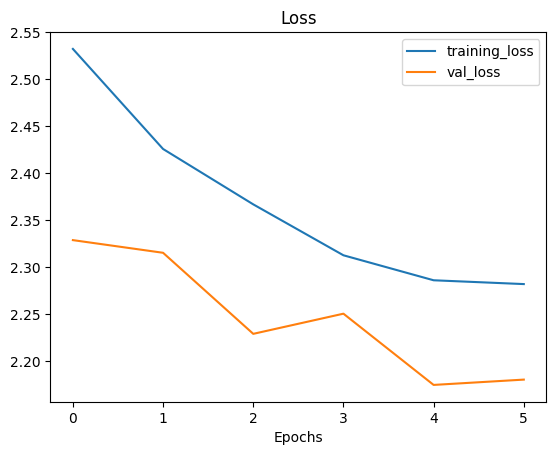

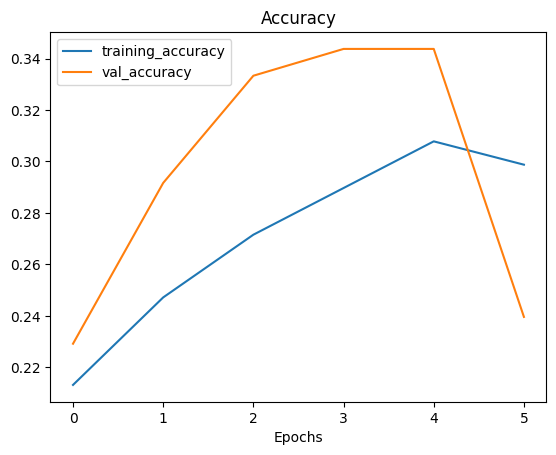

In [ ]:
# Plotting Loss Curves of Feature Extraction Model
plot_loss_curves(history_6)

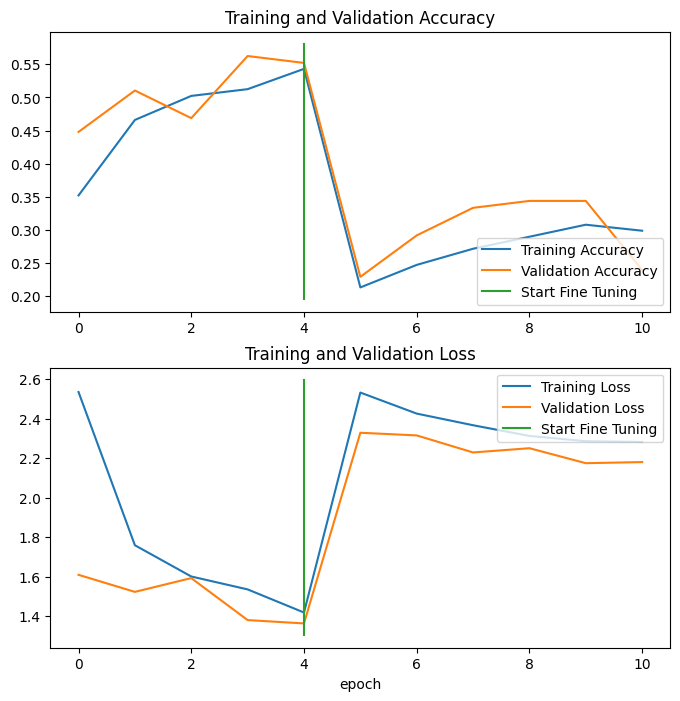

In [ ]:
# Comparing histories
compare_historys(history_5, history_6, 5)

# Tensorboard - Looking which model performed best for us

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/mured